In [1]:
%cd ../

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import os
import htfa_torch.htfa as HTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils
import nilearn
import numpy as np

In [3]:
%matplotlib inline

In [4]:
drop_data = 'data/synthetic_data/'
if not os.path.isdir(drop_data):
    os.makedirs(drop_data)

In [5]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [6]:
synthetic_db = niidb.FMriActivationsDb('data/synthetic_data_multidistz_norest_wholebrain.db', mask='data/synthetic_data/wholebrain.nii.gz')
htfa = HTFA.HierarchicalTopographicFactorAnalysis(list(synthetic_db.all()), mask='data/synthetic_data/wholebrain.nii.gz', num_factors=3)

10/01/2019 18:11:20 Loading Nifti image data/synthetic_data/nifti_files/subject_10_task_2_stimulus_1.nii with mask data/synthetic_data/wholebrain.nii.gz (zscore=False, smooth=None)
10/01/2019 18:11:20 Loading Nifti image data/synthetic_data/nifti_files/subject_10_task_2_stimulus_2.nii with mask data/synthetic_data/wholebrain.nii.gz (zscore=False, smooth=None)
10/01/2019 18:11:20 Loading Nifti image data/synthetic_data/nifti_files/subject_10_task_2_stimulus_3.nii with mask data/synthetic_data/wholebrain.nii.gz (zscore=False, smooth=None)
10/01/2019 18:11:20 Loading Nifti image data/synthetic_data/nifti_files/subject_10_task_2_stimulus_4.nii with mask data/synthetic_data/wholebrain.nii.gz (zscore=False, smooth=None)
10/01/2019 18:11:20 Loading Nifti image data/synthetic_data/nifti_files/subject_10_task_2_stimulus_5.nii with mask data/synthetic_data/wholebrain.nii.gz (zscore=False, smooth=None)
10/01/2019 18:11:20 Loading Nifti image data/synthetic_data/nifti_files/subject_10_task_3_stimu

In [7]:
htfa.load_state('data/synthetic_multidist_k3_n5000_05212019_015512')

In [8]:
htfa.free_energy(batch_size=1000, blocks_batch_size=1000, use_cuda=True,
                 num_particles=5, sample_size=100)

[[23484888.0, -23463414.0, 21475.6328125],
 [23858716.0, -4.605170249938965, 23125.556640625]]

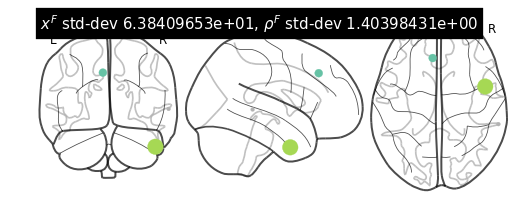

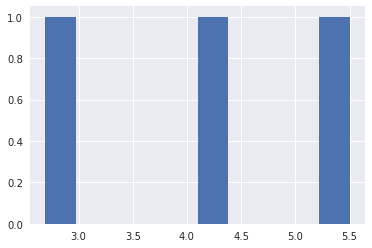

(<nilearn.plotting.displays.OrthoProjector at 0x7f0a5c28a780>,
 tensor([[ -5.7152,  32.1769,  38.8604],
         [ 49.5506,   2.2172, -39.1192],
         [ 63.4461, -37.3669,   0.6749]]),
 tensor([4.1470, 5.5010, 2.6937]))

In [9]:
htfa.visualize_factor_template(filename='factor_embedding_init')

In [10]:
def task_rest_labeler(block):
    if 'baseline' in block.task:
        return 'Baseline'
    return 'Task'

In [11]:
Group_1_last = 5
Group_2_last = 10
def subject_labeler(subject):
    if subject >= 1 and subject <= Group_1_last:
        condition = 0
    elif subject > Group_1_last and subject <= Group_2_last:
        condition = 1
    else:
        condition = 2
    if condition == 0:
        return 'Group 1'
    elif condition == 1:
        return 'Group 2'
    else:
        return 'Group 3'

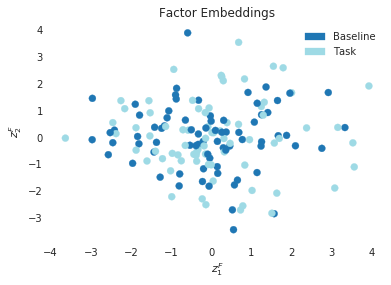

In [12]:
#factor 'embeddings' with PCA
htfa.scatter_factor_embedding(labeler=task_rest_labeler, embedding='PCA')

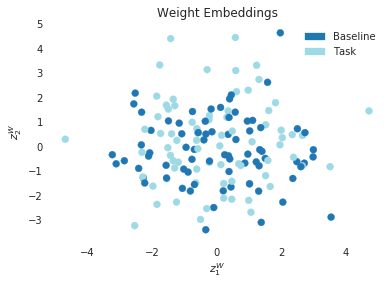

In [13]:
#weight 'embeddings' with PCA
htfa.scatter_weight_embedding(labeler=task_rest_labeler, embedding='PCA')

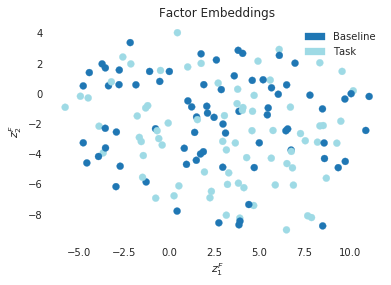

In [14]:
#factor 'embeddings' with TSNE
htfa.scatter_factor_embedding(labeler=task_rest_labeler, embedding='TSNE')

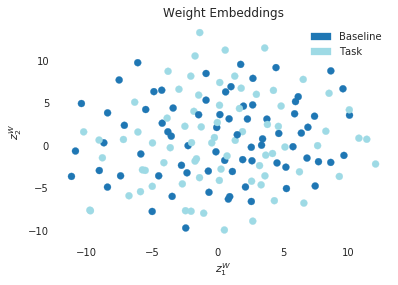

In [15]:
#weight 'embeddings' with TSNE
htfa.scatter_weight_embedding(labeler=task_rest_labeler, embedding='TSNE')

In [16]:
def synthetic_multidist_labeler(block):
    subject = subject_labeler(block.subject)
    task = task_rest_labeler(block)
    return subject + ', ' + task + ' stimulus'

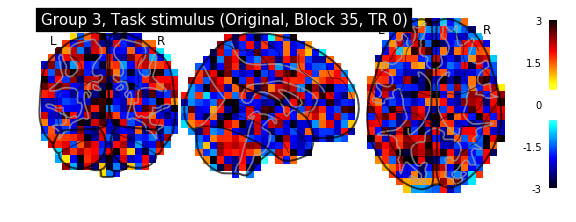

10/01/2019 18:11:50 Reconstruction Error (Frobenius Norm): 3.24996582e+02 out of 3.25026489e+02


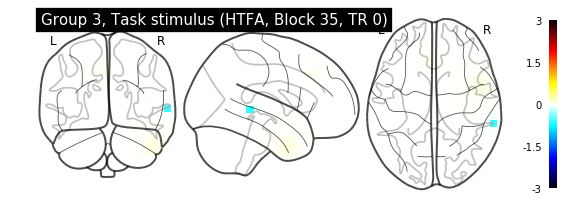

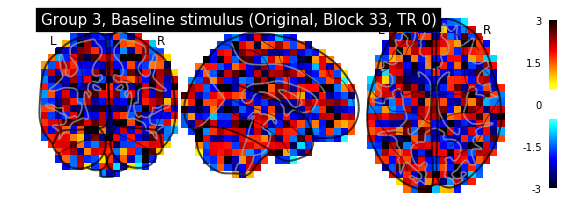

10/01/2019 18:11:53 Reconstruction Error (Frobenius Norm): 3.19197968e+02 out of 3.19249634e+02


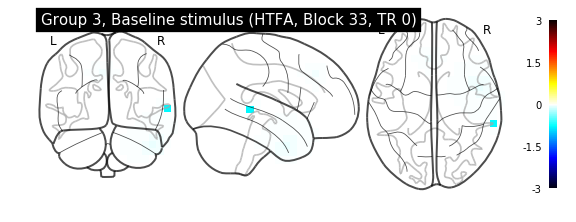

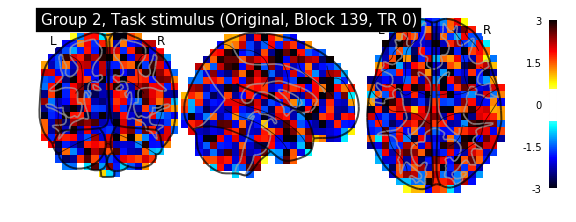

10/01/2019 18:11:55 Reconstruction Error (Frobenius Norm): 3.24774689e+02 out of 3.24809723e+02


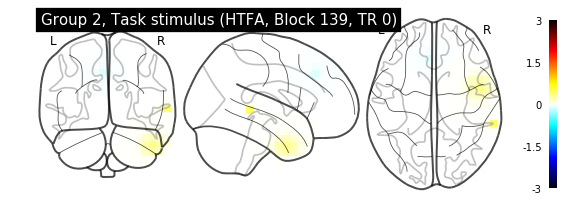

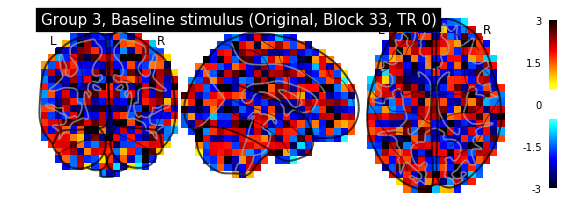

10/01/2019 18:11:57 Reconstruction Error (Frobenius Norm): 3.19197968e+02 out of 3.19249634e+02


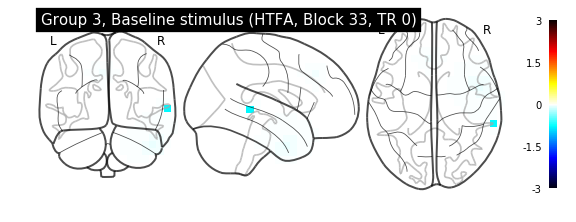

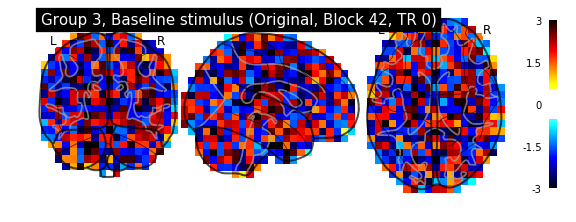

10/01/2019 18:11:59 Reconstruction Error (Frobenius Norm): 3.19745178e+02 out of 3.19788788e+02


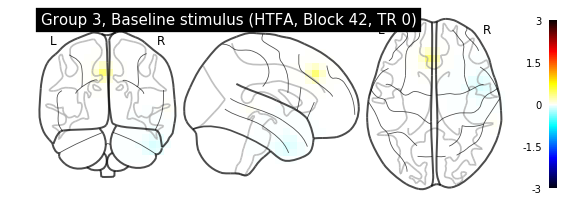

In [17]:
for b in np.random.choice(range(htfa.num_blocks), 5):
    htfa.plot_original_brain(b, labeler=synthetic_multidist_labeler)
    htfa.plot_reconstruction(b, labeler=synthetic_multidist_labeler)

In [18]:
htfa.average_reconstruction_error(weighted=False)

10/01/2019 18:12:00 Average reconstruction error (MSE): 3.21182882e+02 +/- 2.61803203e+00
10/01/2019 18:12:00 Average data norm (Euclidean): 3.21228869e+02 +/- 2.61661759e+00
10/01/2019 18:12:00 Percent average reconstruction error: 99.985680 +/- 5.90264723e-03


(array([317.84204102, 317.68005371, 317.55911255, 318.96298218,
        318.68740845, 323.0135498 , 324.29031372, 323.83718872,
        323.48092651, 324.11248779, 318.96594238, 319.13433838,
        318.54202271, 318.20648193, 319.57333374, 322.93130493,
        324.90826416, 322.15750122, 324.90206909, 324.15872192,
        319.50720215, 318.57168579, 318.1897583 , 318.05599976,
        318.73016357, 323.10910034, 323.09170532, 323.14440918,
        323.5262146 , 324.95480347, 318.48703003, 318.79244995,
        318.06317139, 319.19796753, 318.88330078, 324.99658203,
        324.9559021 , 322.53305054, 324.77929688, 323.29721069,
        317.88415527, 317.51321411, 319.74517822, 318.40740967,
        320.00698853, 322.42425537, 322.4168396 , 323.23226929,
        323.49832153, 323.84817505, 319.49539185, 317.9977417 ,
        317.3565979 , 318.534729  , 319.11956787, 323.10549927,
        325.40274048, 323.38461304, 323.59835815, 323.85629272,
        318.8671875 , 318.27346802, 319.

In [19]:
htfa.average_reconstruction_error()

10/01/2019 18:12:00 Average reconstruction error (MSE): 1.00197017e+00
10/01/2019 18:12:00 Average data norm (Euclidean): 1.00211359e+00
10/01/2019 18:12:00 Percent average reconstruction error: 1.394893


(1.0019701722423908, 1.002113588114858, 0.013948927645538234)